In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.utils import popln_overlap

In [2]:
with open(pickle_dir / 'population_patterns.p', 'rb') as f: 
    population_patterns = pickle.load(f)

In [3]:
def plot_overlaps(all_overlaps, dists, title):
    fig, axs = plt.subplots(3, 1, figsize=(3,6))
    for i, ax in enumerate(axs):
        dist_range = np.arange(9)[3*i: 3*i + 3]
        if not np.any(dists == 0): dist_range += 1
        min_dist = dist_range[0]
        max_dist = dist_range[-1]
        overlaps_in_range = all_overlaps[np.isin(dists, dist_range)]
        num_overlaps_in_range = len(overlaps_in_range)
        ax.hist(
            overlaps_in_range, bins=10, alpha=0.4,
            weights=np.ones(num_overlaps_in_range)/num_overlaps_in_range
            )
        ax.set_xticks([])
        ax.set_xlim((0,1))
        ax.set_ylim((0, 0.75))
        ax.set_ylabel(f"{min_dist} to {max_dist} sites", fontsize=12)
    plt.suptitle(title, fontsize=14)
    plt.xticks(np.arange(0, 1.25, 0.25), np.arange(0, 1.25, 0.25))
    plt.xlabel("Population Overlap", fontsize=12)
    plt.show()
    print(len(all_overlaps))

In [4]:
def get_site_distance(a, b):
    dist = min(
        abs(a - b), 16 - abs(a-b)
        ) % 16
    return dist

# Activity Overlap Between Caching and Retrieval of Different Cache

/home/chingf/Code/cache-arena-analysis/analysis/utils.py:63: RuntimeWarning: invalid value encountered in true_divide
  dist = adotb/(asumsq + bsumsq - adotb)
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


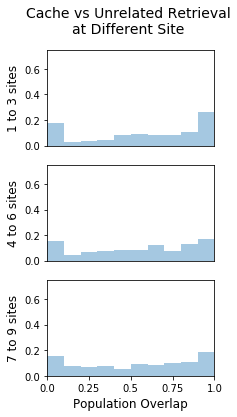

983


In [5]:
all_overlaps = []
dists = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        for j, r_visit in enumerate(r_visits):
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site == c_site: continue
            retriev_pattern_mat = visit_patterns[r_visit]
            overlaps = []
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
                dists.append(get_site_distance(c_site, r_site))

all_overlaps = np.array(all_overlaps)
dists = np.array(dists)
plot_overlaps(all_overlaps, dists, "Cache vs Unrelated Retrieval\nat Different Site")

(array([143., 184., 128.,   0., 153., 110.,   0.,  97., 126.,  42.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

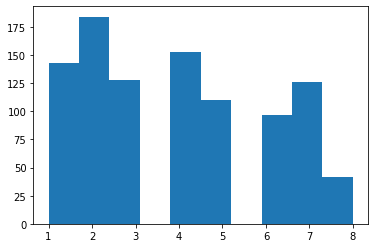

In [6]:
plt.hist(dists)

# Activity Overlap Between Different Site Caching

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered


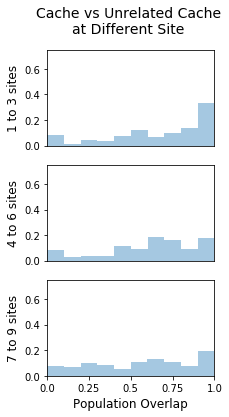

496


In [7]:
all_overlaps = []
dists = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        retrieved = False
        for j, c2_visit in enumerate(c_visits):
            if j <= i: continue
            c2_site = exp_data.cr_sites[exp_data.cr_was_cache][j]
            if c_site == c2_site: continue
            cache2_pattern_mat = visit_patterns[c2_visit]
            overlaps = []
            for cache2_pattern in cache2_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, cache2_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
                dists.append(get_site_distance(c_site, c2_site))
        
all_overlaps = np.array(all_overlaps)
dists = np.array(dists)
plot_overlaps(all_overlaps, dists, "Cache vs Unrelated Cache\nat Different Site")

(array([63., 89., 65.,  0., 77., 59.,  0., 51., 69., 23.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

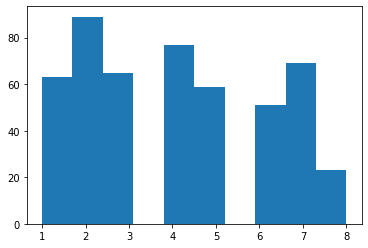

In [8]:
plt.hist(dists)

# Activity Overlap Between Different Site Retrieval

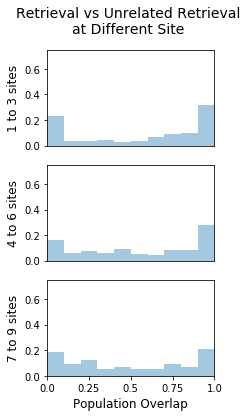

514


In [9]:
all_overlaps = []
dists = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, r_visit in enumerate(r_visits):
        r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][i]
        retriev_pattern_mat = visit_patterns[r_visit]
        for j, r2_visit in enumerate(r_visits):
            if j <= i: continue
            r2_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site == r2_site: continue
            retriev2_pattern_mat = visit_patterns[r2_visit]
            overlaps = []
            for retriev2_pattern in retriev2_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(retriev_pattern_mat, retriev2_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
                dists.append(get_site_distance(r_site, r2_site))
            
all_overlaps = np.array(all_overlaps)
dists = np.array(dists)
plot_overlaps(all_overlaps, dists,"Retrieval vs Unrelated Retrieval\nat Different Site")

(array([ 82., 103.,  70.,   0.,  78.,  55.,   0.,  51.,  54.,  21.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

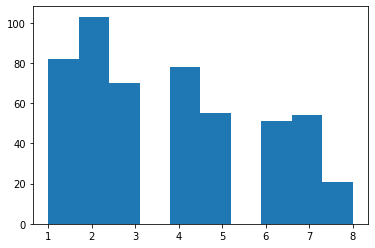

In [10]:
plt.hist(dists)

# Activity Overlap Between Caching and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN slice encountered
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN axis encountered


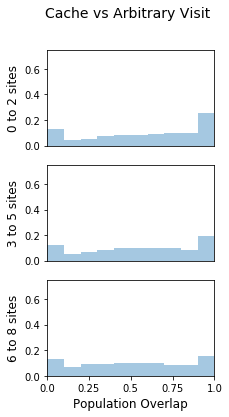

18600


In [18]:
all_overlaps = []
dists = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        noncr_visits_subset = noncr_visits[
            np.random.choice(noncr_visits.shape[0], 200)
            ]
        for j, noncr_visit in enumerate(noncr_visits_subset):
            noncr_site = exp_data.visit_wedges[noncr_visit]
            navig_pattern_mat = visit_patterns[noncr_visit]
            overlaps = []
            for navig_pattern in navig_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, navig_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
                dists.append((get_site_distance(c_site, noncr_site)))
all_overlaps = np.array(all_overlaps)
dists = np.array(dists)
plot_overlaps(all_overlaps, dists, "Cache vs Arbitrary Visit")

In [ ]:
plt.hist(dists)

# Activity Overlap Between Arbitrary Visit and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: All-NaN axis encountered


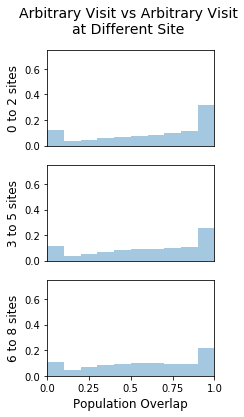

84033


In [20]:
all_overlaps = []
dists = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    noncr_visits_subset = noncr_visits[
        np.random.choice(noncr_visits.shape[0], 100)
        ]
    for i, noncr_visit in enumerate(noncr_visits_subset):
        noncr_site = exp_data.visit_wedges[noncr_visit]
        navig_pattern_mat = visit_patterns[noncr_visit]
        noncr2_visits_subset = noncr_visits[
            np.random.choice(noncr_visits.shape[0], 100)
            ]
        for j, noncr2_visit in enumerate(noncr2_visits_subset):
            noncr2_site = exp_data.visit_wedges[noncr2_visit]
            if noncr2_site == noncr_site: continue
            navig2_pattern_mat = visit_patterns[noncr2_visit]
            overlaps = []
            for navig2_pattern in navig2_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(navig_pattern_mat, navig2_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
                dists.append(get_site_distance(noncr_site, noncr2_site))

all_overlaps = np.array(all_overlaps)
dists = np.array(dists)
plot_overlaps(all_overlaps, dists, "Arbitrary Visit vs Arbitrary Visit\nat Different Site")

In [ ]:
plt.hist(dists)